{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1759762800, 'main': {'temp': 296.96, 'feels_like': 297.33, 'temp_min': 296.96, 'temp_max': 296.96, 'pressure': 1013, 'sea_level': 1013, 'grnd_level': 916, 'humidity': 74, 'temp_kf': 0}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'clouds': {'all': 84}, 'wind': {'speed': 1.16, 'deg': 325, 'gust': 1.31}, 'visibility': 10000, 'pop': 1, 'rain': {'3h': 2.98}, 'sys': {'pod': 'n'}, 'dt_txt': '2025-10-06 15:00:00'}, {'dt': 1759773600, 'main': {'temp': 296.31, 'feels_like': 296.64, 'temp_min': 295, 'temp_max': 296.31, 'pressure': 1013, 'sea_level': 1013, 'grnd_level': 916, 'humidity': 75, 'temp_kf': 1.31}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'clouds': {'all': 86}, 'wind': {'speed': 2.09, 'deg': 310, 'gust': 2.46}, 'visibility': 10000, 'pop': 1, 'rain': {'3h': 0.76}, 'sys': {'pod': 'n'}, 'dt_txt': '2025-10-06 18:00:00'}, {'dt': 1759784400, 'main': {'

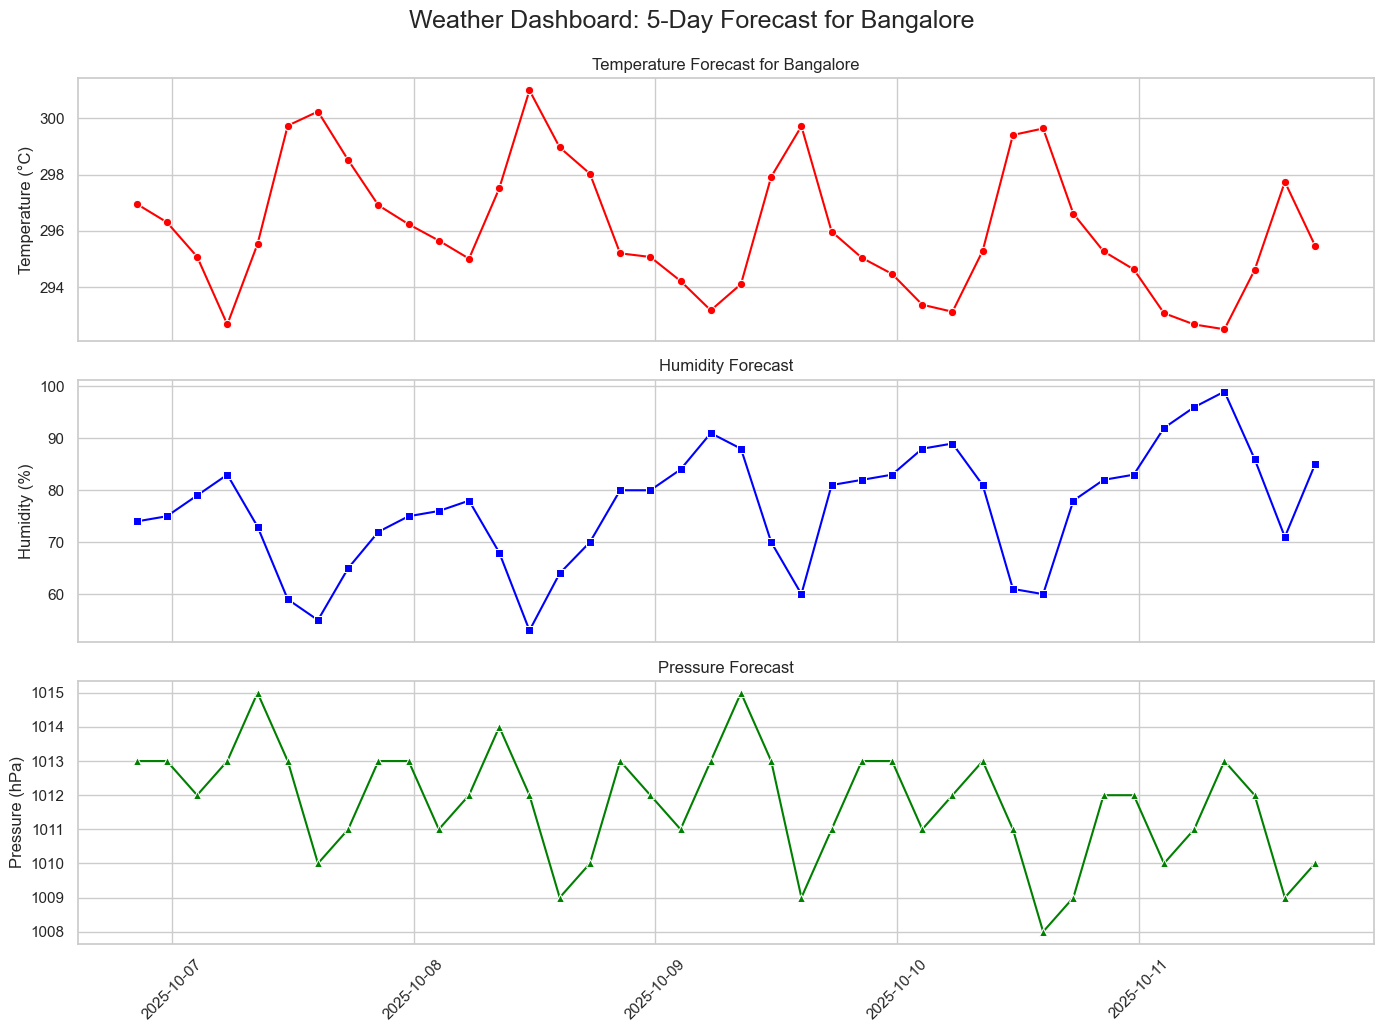

In [4]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

API_key = '501ada00a3ed1b1bba06627376fb6b58'
city_name = 'Bangalore'
url = f"https://api.openweathermap.org/data/2.5/forecast?q={city_name}&appid={API_key}"

response = requests.get(url)
data = response.json()
dates = []
temps = []
humidities = []
pressures = []
print(data)
if 'list' in data:
    for item in data.get('list',[]):
        print(item)
    else:
        print("Error: 'list' key not found in the response.")
    from datetime import datetime
    sunrise_ts=1752020293
    dt = datetime.fromtimestamp(sunrise_ts)
    print(dt)
for item in data['list']:
    dt= datetime.fromtimestamp(item['dt'])
    temp = item['main']['temp']
    humidity = item['main']['humidity']
    pressure = item['main']['pressure']

    dates.append(dt)
    temps.append(temp)
    humidities.append(humidity)
    pressures.append(pressure)

sns.set(style = "whitegrid")
fig,axs = plt.subplots(3,1,figsize=(14,10), sharex=True)


sns.lineplot(ax=axs[0],x=dates,y=temps,color="red",marker="o")
axs[0].set_title(f"Temperature Forecast for {city_name}")
axs[0].set_ylabel("Temperature (°C)")

sns.lineplot(ax=axs[1],x=dates,y=humidities,color="blue",marker="s")
axs[1].set_title("Humidity Forecast")
axs[1].set_ylabel("Humidity (%)")

sns.lineplot(ax=axs[2],x=dates,y=pressures,color="green",marker="^")
axs[2].set_title("Pressure Forecast")
axs[2].set_ylabel("Pressure (hPa)")

plt.xticks(rotation=45)
plt.tight_layout()
plt.suptitle(f"Weather Dashboard: 5-Day Forecast for {city_name}",fontsize=18,y=1.03)
plt.show()
